In [37]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Input
Glycaemia    = ctrl.Antecedent(np.linspace(50, 150, 1000), 'GLY')
Sirolimus    = ctrl.Antecedent(np.linspace(0,  20, 1000), 'SIR')
Cyclosporine = ctrl.Antecedent(np.linspace(0,  20, 1000), 'CYC')
DiffACE      = ctrl.Antecedent(np.linspace(0,  10, 1000), 'DIF')

# Output 
Proteinuria = ctrl.Consequent(np.linspace(0, 4000, 1000), 'PRO')
GFR         = ctrl.Consequent(np.linspace(0,  100, 1000), 'GFR')

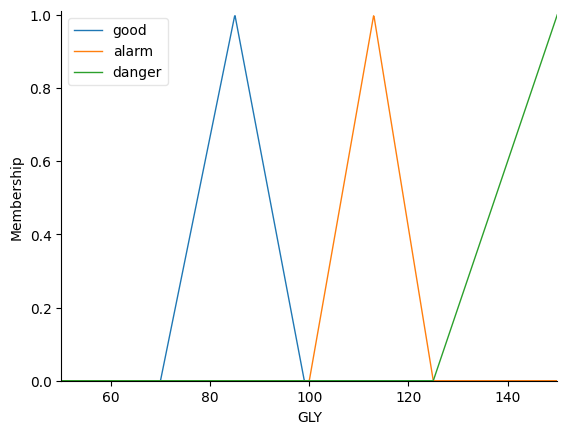

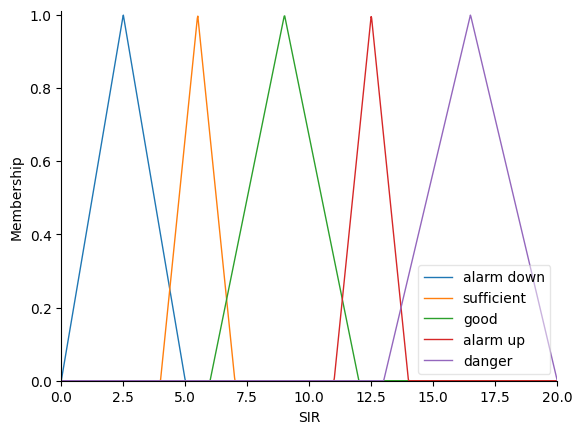

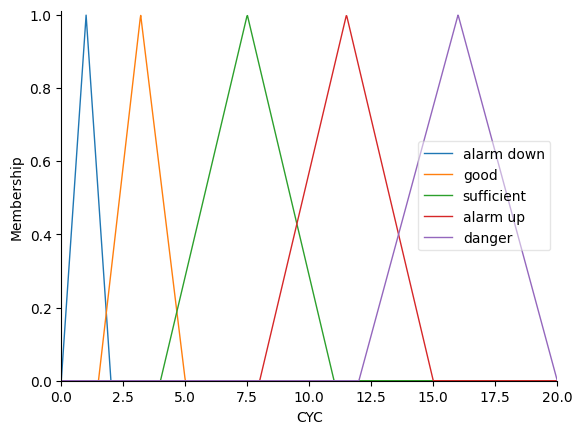

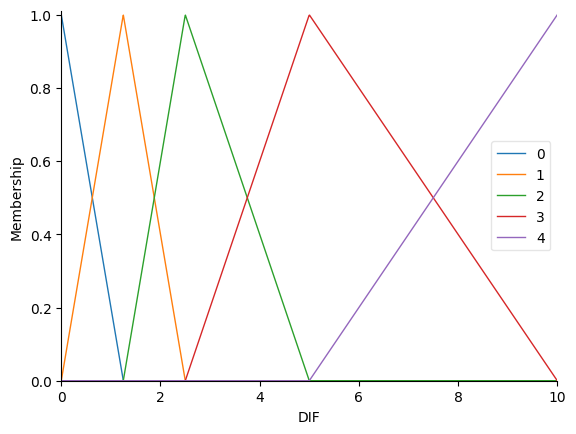

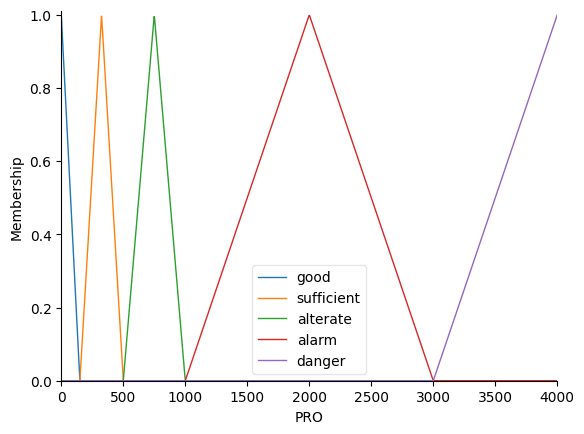

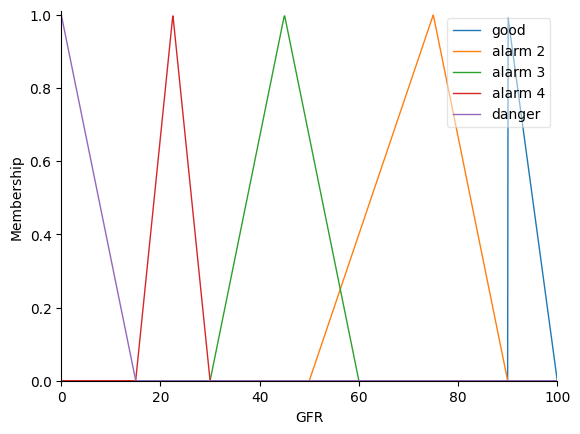

In [39]:
# Membership functions
Glycaemia['good']   = fuzz.trimf(Glycaemia.universe,[ 70,  85,  99])
Glycaemia['alarm']  = fuzz.trimf(Glycaemia.universe,[100, 113, 125])
Glycaemia['danger'] = fuzz.trimf(Glycaemia.universe,[125, 150, 150])
Glycaemia.view()

Sirolimus['alarm down'] = fuzz.trimf(Sirolimus.universe,[  0,   2.5,  5])
Sirolimus['sufficient'] = fuzz.trimf(Sirolimus.universe,[  4,   5.5,  7])
Sirolimus['good']       = fuzz.trimf(Sirolimus.universe,[  6,     9, 12])
Sirolimus['alarm up']   = fuzz.trimf(Sirolimus.universe,[ 11,  12.5, 14])
Sirolimus['danger']     = fuzz.trimf(Sirolimus.universe,[ 13,  16.5, 20])
Sirolimus.view()

Cyclosporine['alarm down']  = fuzz.trimf(Cyclosporine.universe,[  0,    1, 2 ])
Cyclosporine['good']        = fuzz.trimf(Cyclosporine.universe,[1.5,  3.2, 5 ])
Cyclosporine['sufficient']  = fuzz.trimf(Cyclosporine.universe,[  4,  7.5, 11])
Cyclosporine['alarm up']    = fuzz.trimf(Cyclosporine.universe,[  8, 11.5, 15])
Cyclosporine['danger']      = fuzz.trimf(Cyclosporine.universe,[ 12,   16, 20])
Cyclosporine.view()

DiffACE['0'] = fuzz.trimf(DiffACE.universe,[   0,    0, 1.25])
DiffACE['1'] = fuzz.trimf(DiffACE.universe,[   0, 1.25,  2.5])
DiffACE['2'] = fuzz.trimf(DiffACE.universe,[1.25,  2.5,    5])
DiffACE['3'] = fuzz.trimf(DiffACE.universe,[ 2.5,    5,   10])
DiffACE['4'] = fuzz.trimf(DiffACE.universe,[   5,   10,   10])
DiffACE.view()

Proteinuria['good']       = fuzz.trimf(Proteinuria.universe,[   0,    0, 150 ])
Proteinuria['sufficient'] = fuzz.trimf(Proteinuria.universe,[ 150,  325, 500 ])
Proteinuria['alterate']   = fuzz.trimf(Proteinuria.universe,[ 500,  750, 1000])
Proteinuria['alarm']      = fuzz.trimf(Proteinuria.universe,[1000, 2000, 3000])
Proteinuria['danger']      = fuzz.trimf(Proteinuria.universe,[3000, 4000, 4000])
Proteinuria.view()

GFR['good']  = fuzz.trimf(GFR.universe,[90,   90, 100])
GFR['alarm 2'] = fuzz.trimf(GFR.universe,[50,   75,  90])
GFR['alarm 3'] = fuzz.trimf(GFR.universe,[30,   45,  60])
GFR['alarm 4'] = fuzz.trimf(GFR.universe,[15, 22.5,  30])
GFR['danger']    = fuzz.trimf(GFR.universe,[ 0,    0,  15])

GFR.view()

In [40]:
ProtRule = []

ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['good'], Proteinuria['good']))
ProtRule.append(ctrl.Rule(Glycaemia['danger'] & Sirolimus['danger'], Proteinuria['danger']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['sufficient'], Proteinuria['sufficient']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['alarm up'], Proteinuria['alarm']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['sufficient'], Proteinuria['alterate']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm up'], Proteinuria['alterate']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['good'], Proteinuria['sufficient']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm down'], Proteinuria['sufficient']))

#Control system
ProtFIS_control = ctrl.ControlSystem(ProtRule)
ProtFIS_simulation = ctrl.ControlSystemSimulation(ProtFIS_control)

In [41]:
GFRRule = []

GFRRule.append(ctrl.Rule(Glycaemia['danger'] & Cyclosporine['danger'], GFR['danger']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['danger'], GFR['alarm 3']))
GFRRule.append(ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['alarm up'], GFR['alarm 4']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['sufficient'], GFR['alarm 2']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['good'], GFR['good']))
GFRRule.append(ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['good'], GFR['alarm 2']))
GFRRule.append(ctrl.Rule(Glycaemia['danger'] & Cyclosporine['good'], GFR['alarm 3']))

#Control system
GFRFIS_control = ctrl.ControlSystem(GFRRule)
GFRFIS_simulation = ctrl.ControlSystemSimulation(GFRFIS_control)

In [42]:
ProtACERule = []

ProtACERule.append(ctrl.Rule(DiffACE['2'], Proteinuria['sufficient']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['1'], Proteinuria['sufficient']))
ProtACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['1'], Proteinuria['alterate']))
ProtACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['1'], Proteinuria['alarm']))
ProtACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['3'], Proteinuria['alarm']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['3'], Proteinuria['alterate']))
ProtACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['4'], Proteinuria['danger']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['0'], Proteinuria['good']))

#Control system
ProtACE_control = ctrl.ControlSystem(ProtACERule)
ProtACE_simulation = ctrl.ControlSystemSimulation(ProtACE_control)

In [43]:
GFRACERule = []

GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['2'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['2'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['1'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['1'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['3'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['3'], GFR['alarm 4']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['4'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['0'], GFR['good']))
GFRACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['4'], GFR['danger']))

#Control system
GFRACE_control = ctrl.ControlSystem(GFRACERule)
GFRACE_simulation = ctrl.ControlSystemSimulation(GFRACE_control)

55.57164274545485
87.53620995249571
53.19329426074221
93.55931843241494


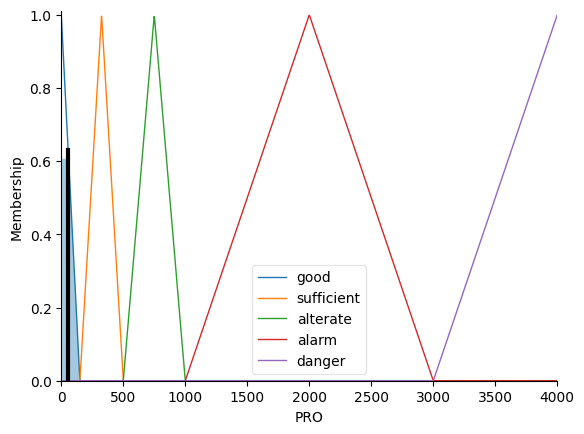

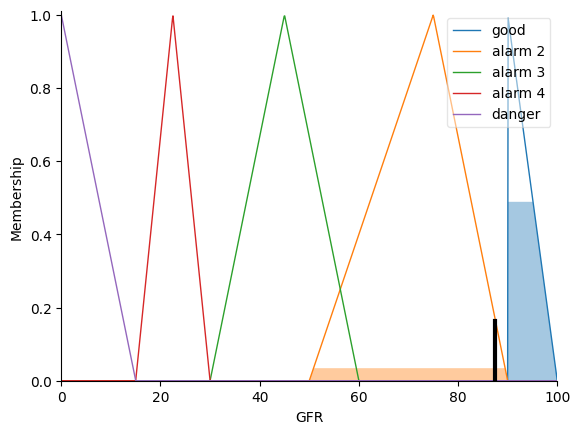

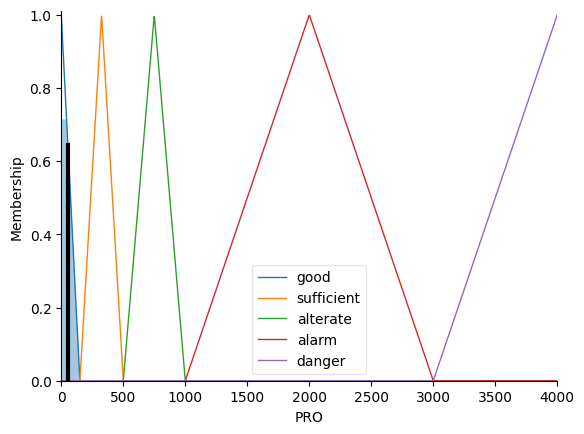

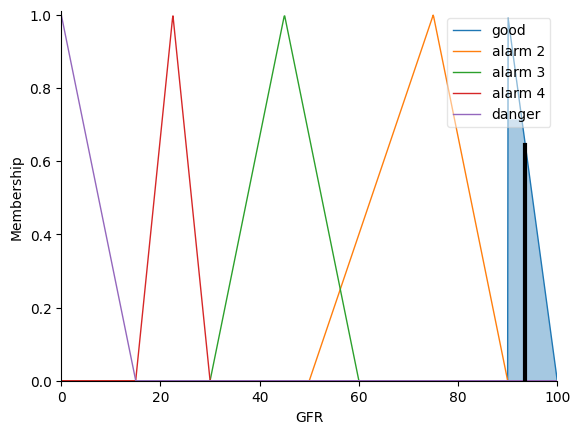

In [44]:
# Compute
ProtFIS_simulation.input['GLY'] = 90
ProtFIS_simulation.input['SIR'] = 7.82

GFRFIS_simulation.input['GLY'] = 142
GFRFIS_simulation.input['CYC'] = 4.12

ProtACE_simulation.input['GLY'] = 89
ProtACE_simulation.input['DIF'] = 2.5

GFRACE_simulation.input['GLY'] = 89
GFRACE_simulation.input['DIF'] = -2.5

ProtFIS_simulation.compute()
print(ProtFIS_simulation.output['PRO'])
Proteinuria.view(sim = ProtFIS_simulation)

GFRFIS_simulation.compute()
print(GFRFIS_simulation.output['GFR'])
GFR.view(sim = GFRFIS_simulation)

ProtACE_simulation.compute()
print(ProtACE_simulation.output['PRO'])
Proteinuria.view(sim = ProtACE_simulation)

GFRACE_simulation.compute()
print(GFRACE_simulation.output['GFR'])
GFR.view(sim = GFRACE_simulation)